<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project: Rossmann Drugstore

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

This machine learning project is taken from Kaggle. The link to the Kaggle competition page is https://www.kaggle.com/c/rossmann-store-sales

In their first Kaggle competition, Rossmann is challenging you to predict **7 weeks of daily sales for 1,115 stores** located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fn 1: Root Mean Squared Percentage Error Function

According to Kaggle, submissions are evaluated on the Root Mean Square Percentage Error (RMSPE). The RMSPE is calculated as such:

$$RMSPE = \sqrt{\frac{1}{n}\sum_{i=1}^n\left(\frac{y_i - \hat{y}_i}{y_i}\right)^{2}}$$

The code below is a function that calculates the RMSPE.

In [2]:
# Function that calculates and returns the RMSPE
def rmspe(y_test, y_pred):
    
    y_test=np.array(y_test)
    y_pred=np.array(y_pred)

    ytest_ypred = pd.DataFrame(y_test, y_pred).reset_index()
    ytest_ypred.columns = ['Predicted_Sales','Actual_Sales']

    # Removing rows that contain zero to prevent division by zero when calculating RMSPE
    ytest_ypred.drop(ytest_ypred[ytest_ypred['Actual_Sales']==0].index,axis=0, inplace=True)

    rmspe = np.sqrt(np.mean(((ytest_ypred['Actual_Sales']-ytest_ypred['Predicted_Sales']) / ytest_ypred['Actual_Sales']) ** 2))
    return rmspe

# Fn 2: Residuals Plotting Function

The code below is a function that plots the residuals against time. Residuals are defined as the difference between the actual sales values and the predicted sales values.

Residual plots are a way to visualize how the errors are distributed. Ideally, the errors should be distributed randomly with a mean of zero, and the standard deviation of the errors should not change with time.

In [3]:
# Function that plots residuals against time for train_validation dataset
def residual_plot(y_pred, train_sub_val_file_path, model_type):
    
    train_sub_validation = pd.read_csv(train_sub_val_file_path, index_col = 0, dtype=types)
    train_sub_validation['Date'] = pd.to_datetime(train_sub_validation['Date'])
    
    plotting_df = pd.DataFrame()
    plotting_df[['Date','Sales']] = train_sub_validation[['Date', 'Sales']]
    plotting_df['Predicted_Sales'] = np.array(y_pred)

    plotting_df['Residuals'] = plotting_df['Sales'] - plotting_df['Predicted_Sales']
    
    # Calculating the mean
    residual_mean = plotting_df['Residuals'].mean()
    
    # Calculating the standard deviations
    residual_std = plotting_df['Residuals'].std()
    
    # Plotting the residuals
    fig, ax = plt.subplots(figsize = (16,8))
    ax.scatter(plotting_df['Date'].values, plotting_df['Residuals'].values, marker='+', alpha = 0.5)
    ax.set_xlabel('Time')
    ax.set_ylabel('Sales residuals')
    ax.set_title('Scatterplot of {} residuals against time'.format(model_type))
    
    # Plotting the mean of residuals as a horizontal line
    ax.axhline(y=residual_mean, color='black')
    ax.text('2015-06-08', residual_mean, 'mean={:.1f}'.format(residual_mean), fontsize=10, backgroundcolor='w')
    
    # Plotting the first standard deviations as horizontal lines
    ax.axhline(y=residual_mean+residual_std, color='black', linestyle = ':')
    ax.axhline(y=residual_mean-residual_std, color='black', linestyle = ':')
    ax.text('2015-08-05', residual_mean+residual_std, '+1 standard deviation', fontsize=10, backgroundcolor='w')
    ax.text('2015-08-05', residual_mean-residual_std, '-1 standard deviation', fontsize=10, backgroundcolor='w')
    
    return ax

# Fn 3: Residual mean and standard deviation function

The code below is a function that calculates and returns the mean and standard deviations of the residuals

In [4]:
def residual_mean_std(y_pred, train_sub_val_file_path):
    
    train_sub_validation = pd.read_csv(train_sub_val_file_path, index_col = 0, dtype=types)
    train_sub_validation['Date'] = pd.to_datetime(train_sub_validation['Date'])
    
    df = pd.DataFrame()
    df[['Date','Sales']] = train_sub_validation[['Date', 'Sales']]
    df['Predicted_Sales'] = np.array(y_pred)
    df['Residuals'] = df['Sales'] - df['Predicted_Sales']
    
    # Calculating the mean
    residual_mean = df['Residuals'].mean()
    
    # Calculating the standard deviations
    residual_std = df['Residuals'].std()
    
    return(residual_mean, residual_std)

# Fn 4: Actual sales vs Predicted sales plot function

The code below is a function that plots out the time series plots of actual sales and predicted sales of selected stores in the train_validation dataset.

In [5]:
# Plotting the actual sales and predicted sales of the train_validation dataframe for selected stores
def actual_pred_sales_plot(y_pred, train_sub_val_file_path):

    # Import train_validation.csv into a dataframe
    train_sub_validation = pd.read_csv(train_sub_val_file_path, index_col = 0, dtype=types)
    train_sub_validation['Date'] = pd.to_datetime(train_sub_validation['Date'])
    
    # Incorporate y_pred into train_validation dataframe
    train_sub_validation['Predicted_Sales'] = y_pred
    
    selected_stores = [2, 7, 85, 259, 562, 1, 4, 732, 530, 512]

    for store_id in selected_stores:
        fig, ax = plt.subplots(figsize = (16,3))
        ax.plot(train_sub_validation[train_sub_validation['Store']==store_id]['Date'], train_sub_validation[train_sub_validation['Store']==store_id]['Sales'])
        ax.plot(train_sub_validation[train_sub_validation['Store']==store_id]['Date'], train_sub_validation[train_sub_validation['Store']==store_id]['Predicted_Sales'])
        ax.set_title('Plot of actual sales and predicted sales against time for Store {}'.format(store_id))
        ax.set_ylabel('Sales')
        plt.legend()
        plt.show()

    return ax

# Baseline Model #2 - Predict using mean sales for each Day of Week in past 2.5 years

Baseline Model #2 uses the mean sales of each store for each day of the week over the last 2.5 years to predict the daily sales for the next six weeks for each store.

In [6]:
# Import the train_sub dataset
types = {'StateHoliday': np.dtype(str)}

train_sub = pd.read_csv('train_sub.csv', dtype=types, parse_dates=[3]).iloc[:,1:]
train_sub.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-06-19,4202,487,1,1,0,0
1,2,5,2015-06-19,4926,544,1,1,0,0
2,3,5,2015-06-19,8074,797,1,1,0,0
3,4,5,2015-06-19,9686,1281,1,1,0,0
4,5,5,2015-06-19,5711,610,1,1,0,0


In [12]:
# Creating our baseline model#2

# Grouping by Store and DayOfWeek, calculate the mean sales
mean_sales_dow = train_sub.groupby(['Store','DayOfWeek'])['Sales'].mean()
mean_sales_dow = mean_sales_dow.reset_index()

# Import the train_sub_validation dataset
types = {'StateHoliday': np.dtype(str)}
train_sub_validation = pd.read_csv('train_sub_validation.csv', dtype=types, parse_dates=[3]).iloc[:,1:]

# Append the mean_sales to the train_sub_validation dataset
merged_df = pd.merge(train_sub_validation, mean_sales_dow, how='left', on=['Store','DayOfWeek'])
merged_df.rename(columns={'Sales_x':'Actual_Sales', 'Sales_y': 'Predicted_Sales'}, inplace=True)

merged_df.head()

,Store,DayOfWeek,Date,Actual_Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Predicted_Sales
0,1,5,2015-07-31,5263,555,1,1,0,1,4527.945736
1,2,5,2015-07-31,6064,625,1,1,0,1,4455.550388
2,3,5,2015-07-31,8314,821,1,1,0,1,6821.472868
3,4,5,2015-07-31,13995,1498,1,1,0,1,8995.720930
4,5,5,2015-07-31,4822,559,1,1,0,1,4622.581395


In [13]:
# Calculate the RMSPE for our baseline model #2
print('The RMSPE of the baseline model is {:.5f}'.format(rmspe(merged_df['Actual_Sales'], merged_df['Predicted_Sales'])))

The RMSPE of the baseline model is 0.22621


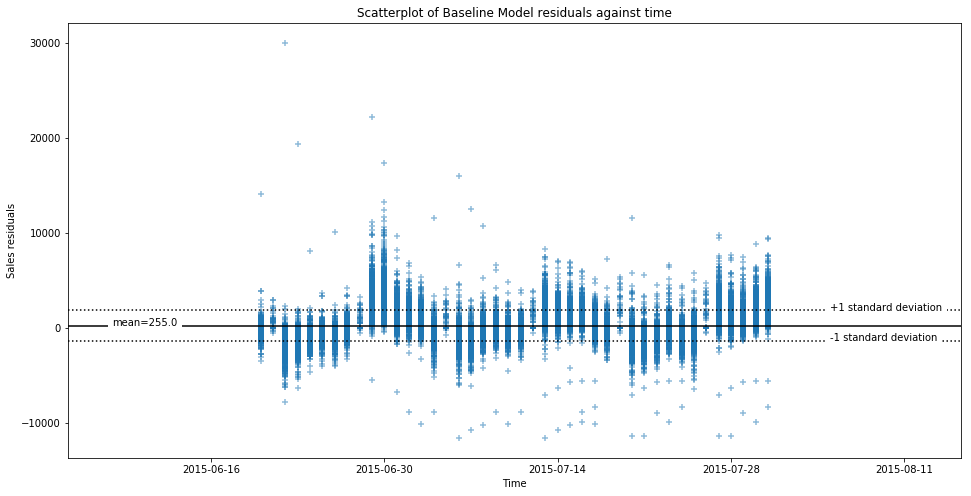

In [14]:
# Plotting out the residuals of the baseline model#2
residual_plot(merged_df['Predicted_Sales'], 'train_sub_validation.csv','Baseline Model')
plt.show()

In [15]:
# Mean of baseline model #1 residuals
print('The mean of the residuals of baseline model #2 is {:.3f}'.format(residual_mean_std(merged_df['Predicted_Sales'],'train_sub_validation.csv')[0]))

# Standard deviation of baseline model #1 residuals
print('The standard deviation of the residuals of baseline model #2 is {:.3f}'.format(residual_mean_std(merged_df['Predicted_Sales'],'train_sub_validation.csv')[1]))

The mean of the residuals of baseline model #2 is 255.011
The standard deviation of the residuals of baseline model #2 is 1585.152


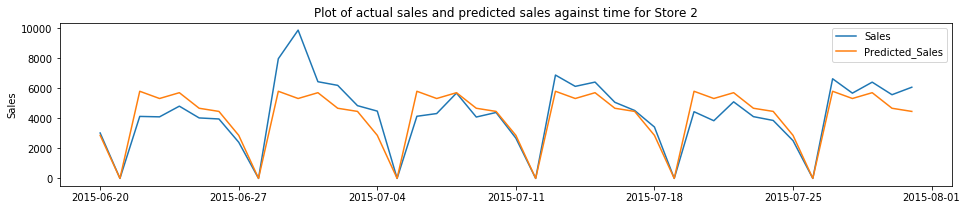

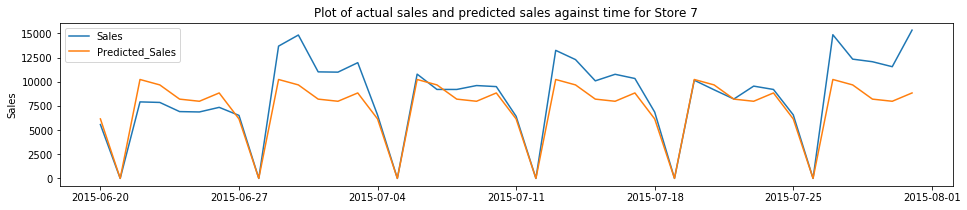

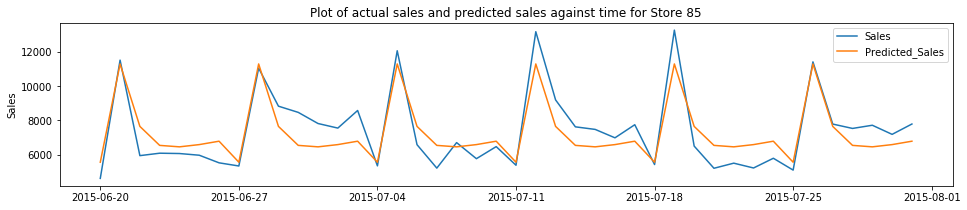

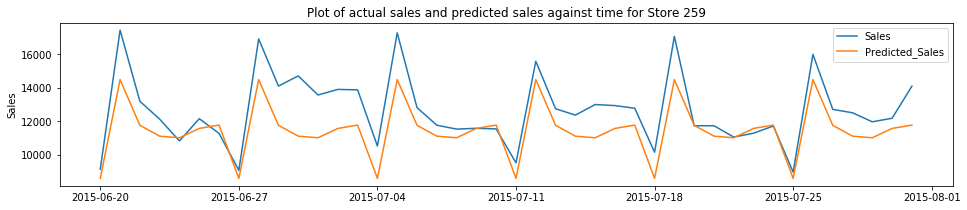

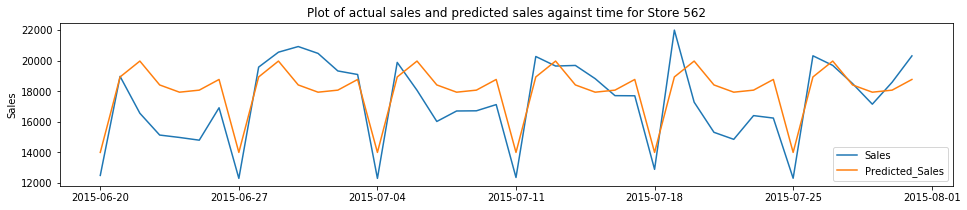

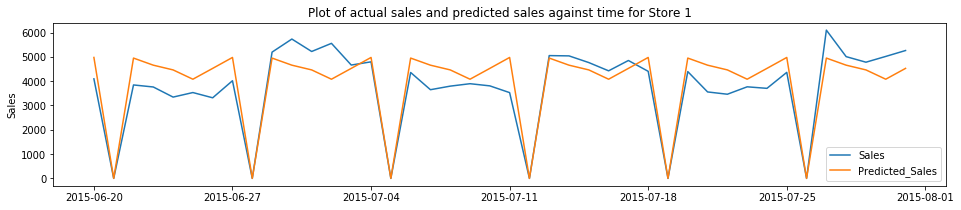

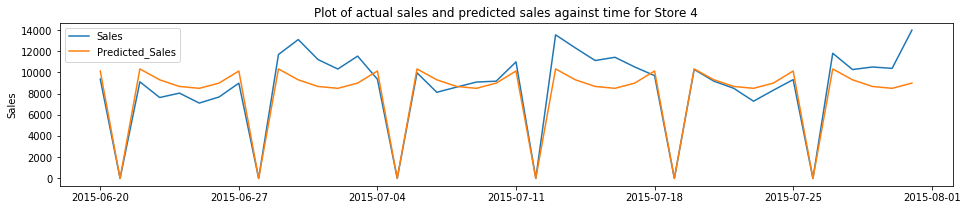

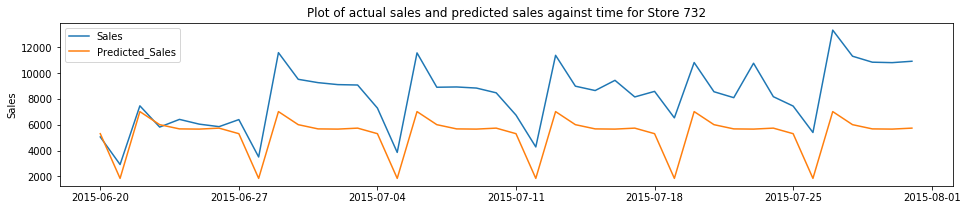

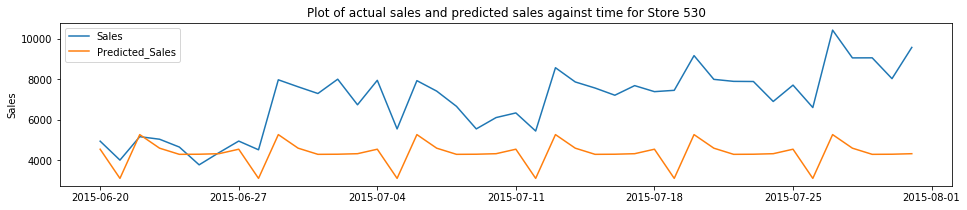

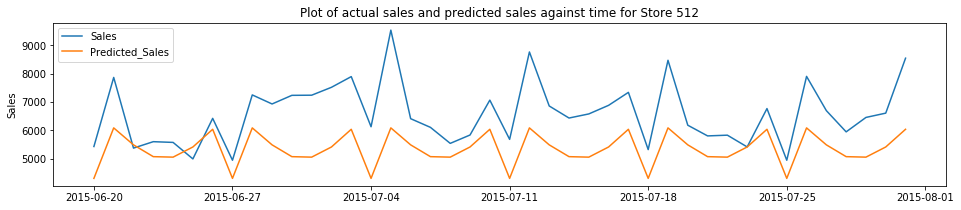

In [16]:
# Plotting the actual sales and predicted sales of the train_validation dataframe for selected stores

actual_pred_sales_plot(merged_df['Predicted_Sales'], 'train_sub_validation.csv')
plt.show()

The points below states the RMSPE and the shortcomings of the baseline model.

- The RMSPE of Baseline Model #2 is **22.621%**, which is a large improvement over the RMSPE of Baseline Model #1 (**29.161%**)
- The residuals have a positive mean (255), which means that the baseline model's predictions tend to underestimate future sales. But the mean is closer to zero as compared to Baseline Model #1 (1039), which is an improvement.
- The standard deviation of the predictions is still quite large (1585), but smaller as compared to Baseline Model #1 (1886) 
- The residuals do not appear to be distributed randomly about the mean - the residuals tend to be largest on Mondays, and smallest on Saturdays. There is a pattern to the residuals.

# Evaluation of Baseline Model #2 on test set

We will be generating sales predictions for the test set, and upload the results to Kaggle to see what score will be achieved.

In [17]:
# Import the test dataset
types = {'StateHoliday': np.dtype(str)}
test = pd.read_csv('test.csv', dtype=types, parse_dates=[3])
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [18]:
mean_sales_dow.head()

,Store,DayOfWeek,Sales
0,1,1,4951.773438
1,1,2,4659.813953
2,1,3,4464.922481
3,1,4,4081.922481
4,1,5,4527.945736


In [19]:
# Append the mean_sales to the validation dataset
test_merged_df = pd.merge(test, mean_sales_dow, how='left', on=['Store','DayOfWeek'])

test_merged_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,1,4,2015-09-17,1.0,1,0,0,4081.922481
1,2,3,4,2015-09-17,1.0,1,0,0,6338.790698
2,3,7,4,2015-09-17,1.0,1,0,0,7981.891473
3,4,8,4,2015-09-17,1.0,1,0,0,5912.480620
4,5,9,4,2015-09-17,1.0,1,0,0,5556.937984


In [20]:
test_submission= test_merged_df[['Id','Sales']]
test_submission.index = test_submission['Id']
test_submission.drop('Id', axis=1, inplace=True)
test_submission.to_csv('Baseline_Model_2.csv')

C:\Users\dsiow\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


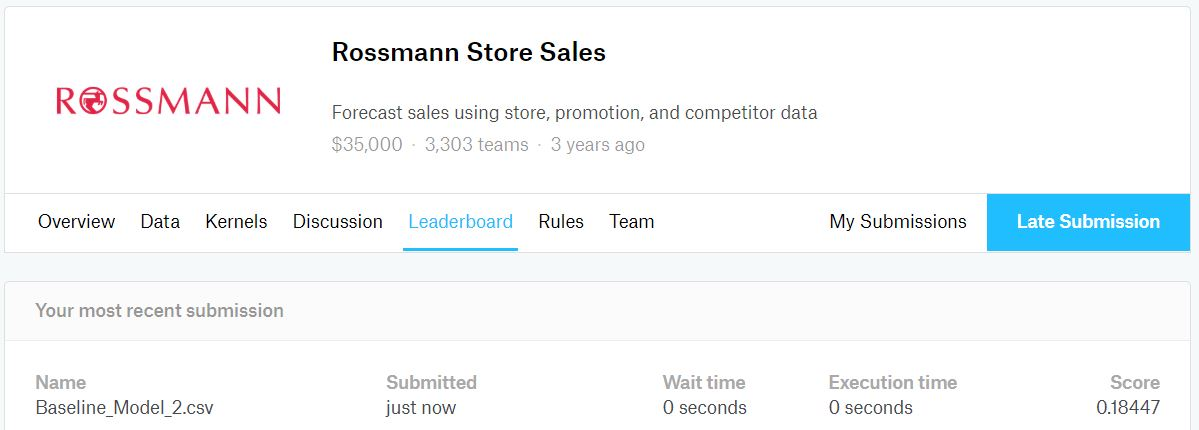


The rmspe score by Kaggle for baseline model #2 is 0.18447, which is better than the scored achieved by baseline model #1 (0.25600)